In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
from pathlib import Path
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# Create a reference to the file. 
database_path = Path("/Users/ellandalla/Desktop/sqlalchemy-challenge/SurfsUp/Resources/hawaii.sqlite")
# create engine to hawaii.sqlite
engine = create_engine(f"sqlite:///{database_path}")
conn = engine.connect()

In [5]:

# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)


In [6]:
# View all of the classes that automap found
classes = Base.classes.keys()
# Print the list of class names
for cls_name in classes:
    print(cls_name)

measurement
station


In [7]:
# Save references to each table
Measurement = Base.classes.measurement
station = Base.classes.station


In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)



# Exploratory Precipitation Analysis

In [9]:
# Query All Records in the the Measuerement table

Measurement_data = pd.read_sql("SELECT * FROM Measurement", conn)
station_data = pd.read_sql("SELECT * FROM station", conn)

Measurement_data.head()
#station_data.head()

## Find the most recent date in the dataset

recent_date = Measurement_data["date"].max()
recent_date
m_types = Measurement_data.dtypes
m_types



id           int64
station     object
date        object
prcp       float64
tobs       float64
dtype: object

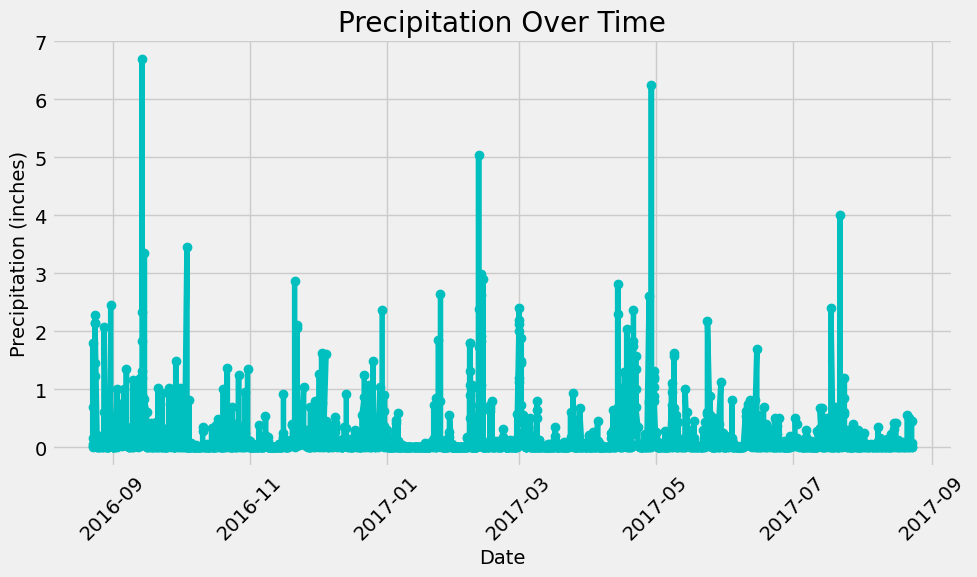

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Convert 'date' column to datetime data type
Measurement_data['date'] = pd.to_datetime(Measurement_data['date'])



# Starting from the most recent data point in the database. 
recent_date = Measurement_data["date"].max()

# Calculate the date one year from the last date in data set.
start_date = recent_date - pd.DateOffset(months=12)


# Perform a query to retrieve the data and precipitation scores

#  create a new DataFrame to include only the past 12 months
P12_months_data = Measurement_data.loc[(Measurement_data['date'] >= start_date) & (Measurement_data['date'] <= recent_date)]


## retrive precipitation data
precipitation_data = P12_months_data["prcp"]

# Save the query results as a Pandas DataFrame. 
new_measurement = P12_months_data[["date", "prcp"]]

# Sort the dataframe by date

sorted_measurement = new_measurement.sort_values(by='date')
sorted_measurement
# Use Pandas Plotting with Matplotlib to plot the data

plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(sorted_measurement['date'], sorted_measurement['prcp'], marker='o', linestyle='-', color='c')
plt.title('Precipitation Over Time')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.grid(True)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()








In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_statistics = sorted_measurement['prcp'].describe()
summary_statistics


count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset

station_count = Measurement_data["station"].nunique()
station_count
#station_data.tail()

9

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
count = Measurement_data["station"].value_counts()
print (count)
active_station = count.idxmax()
active_station


USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: station, dtype: int64


'USC00519281'

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
USC00519523 = Measurement_data[Measurement_data["station"] =="USC00519281"]
lowest= Measurement_data["prcp"].min()
highest = Measurement_data["prcp"].max()
average =Measurement_data["prcp"].mean()
print (lowest,
      highest,
      average)

0.0 11.53 0.16064353974479367


In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
P12_USC00519281 = P12_months_data[P12_months_data["station"] =="USC00519281"]
P12_USC00519281

,id,station,date,prcp,tobs
14607,14608,USC00519281,2016-08-23,1.79,77.0
14608,14609,USC00519281,2016-08-24,2.15,77.0
14609,14610,USC00519281,2016-08-25,0.06,80.0
14610,14611,USC00519281,2016-08-26,0.01,80.0
14611,14612,USC00519281,2016-08-27,0.12,75.0
...,...,...,...,...,...
14954,14955,USC00519281,2017-08-14,0.00,77.0
14955,14956,USC00519281,2017-08-15,0.32,77.0
14956,14957,USC00519281,2017-08-16,0.12,76.0
14957,14958,USC00519281,2017-08-17,0.01,76.0


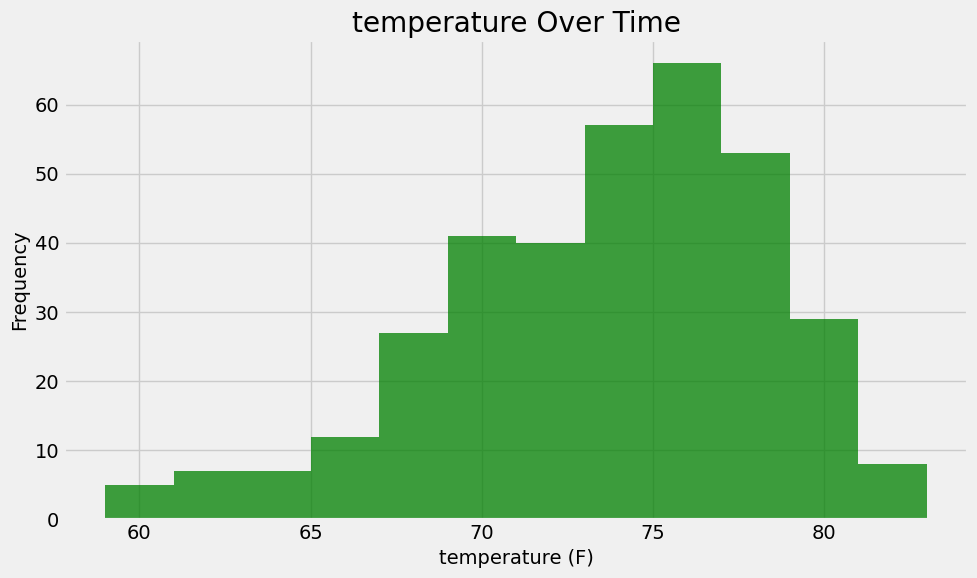

In [16]:
# plot histogram

plt.figure(figsize=(10, 6))
plt.hist(P12_USC00519281['tobs'], bins=12, alpha=0.75, color='green')
plt.title('temperature Over Time')
plt.xlabel('temperature (F)')
plt.ylabel('Frequency')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

# Close Session

In [17]:
# Close Session
session.close()

In [18]:
import numpy as np

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import datetime as dt

from flask import Flask, jsonify

In [19]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [20]:
Base.metadata.tables

FacadeDict({'measurement': Table('measurement', MetaData(), Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False), Column('station', TEXT(), table=<measurement>), Column('date', TEXT(), table=<measurement>), Column('prcp', FLOAT(), table=<measurement>), Column('tobs', FLOAT(), table=<measurement>), schema=None), 'station': Table('station', MetaData(), Column('id', INTEGER(), table=<station>, primary_key=True, nullable=False), Column('station', TEXT(), table=<station>), Column('name', TEXT(), table=<station>), Column('latitude', FLOAT(), table=<station>), Column('longitude', FLOAT(), table=<station>), Column('elevation', FLOAT(), table=<station>), schema=None)})

In [21]:
app = Flask(__name__)

In [22]:
@app.route("/")
def welcome():
    return(
        f"Available Routes:<br/>"
        f"/api/v1.0/precipitation<br/>"
        f"/api/v1.0/stations<br/>"
        f"/api/v1.0/tobs<br/>"
    )



In [23]:
@app.route("/api/v1.0/precipitation")
def precipitation():
    # Create a session 
    session = Session(engine)
    # Calculate the date one year ago from the latest date in the database
    latest_date = session.query(func.max(measurement.date)).scalar()
    one_year_ago = latest_date - timedelta(days=365)
    
    
    
    # Query precipitation data for the last year
    precipitation_data = session.query(measurement.date, measurement.prcp).filter(measurement.date >= one_year_ago).all()
    
    # Convert the result to a dictionary
    precipitation_dict = {date: prcp for date, prcp in precipitation_data}
    
    # Close the session
    session.close()
    
    # Return the JSONified precipitation data
    return jsonify(precipitation_dict)


In [24]:
@app.route("/api/v1.0/stations")
def stations():
    #create a session
    session = Session(engine)
    ## list of all station 
    Stations = session.query(station.name).all()
    list = []
    for item in Stations:
        if item not in list:
            list.append(item)
     # Close the session
    session.close()
    #Return the JSONified station data
    return jsonify(list)
    
     

   





In [25]:
@app.route("/api/v1.0/tobs")
def tobs():
    #create a session
    session = Session(engine)
    # Calculate the date one year ago from the latest date in the database
    latest_date = session.query(func.max(Measurement.date)).scalar()
    print(latest_date)
    one_year_ago = latest_date - timedelta(days=365)
    
    # Query precipitation data for the last year
    precipitation_data = session.query(measurement.date, measurement.tobs).filter(measurement.date >= one_year_ago).all() 
    
    # Query precipitation data for the last year for the most reapated station
    active_station_tobs = precipitation_data.filter(measurement.station == 'USC00519281').all()
     ## close session
    session.close()
    #return jsonified query result
    return jsonify(active_station_tobs)



In [26]:
@app.route("/api/v1.0/<start>")
def measurements():
    #create a session
    session = Session(engine)
    # Calculate the earliest date in the  database
    earliest_date = session.query(func.min(measurement.date)).scalar()
    
    query_date = dt.date(earliest_date) - dt.timedelta(days =365)
    
    #calculate TMIN, TAVG, and TMAX for all the dates greater than or equal to the start date
    stats_range= session.query(
        func.min(measurement.tobs).label('TMIN'),
        func.max(measurement.tobs).label('TMAX'),
        func.avg(measurement.tobs).label('TAVG')).filter(measurement.date == query_date).all()
    
    ## close session
    session.close()
    
    #Return Json
    return jsonify(stats_range)
    
    
    

In [27]:
@app.route("/api/v1.0/<start>/<end>")
def range_measurements():
    #create a session
    session = Session(engine)
    # Calculate the start date 2 years ago from the latest date in the database
    earliest_date = session.query(func.min(measurement.date)).scalar()
    
    # Calculate the end date as 1 year after the start date  
    end_date - earliest_date + timedelta(day=365)
    #calculate TMIN, TAVG, and TMAX for all the dates within the range
    stats= session.query(
        func.min(measurement.tobs).label('TMIN'),
        func.max(measurement.tobs).label('TMAX'),
        func.avg(measurement.tobs).label('TAVG')).filter(measurement.date >= earliest_date).all()
    
    ## close session
    session.close()
    
    #Return Json
    return jsonify(stats)
    

In [28]:
%tb

No traceback available to show.
